In [ ]:
API_Key = "GCgiv4vJVqgTLTfKGOWcg00489WyxOWrTFxg5KdiBGLKlyJvhd2SZAQUAV5J0aOB"
Secret_Key = "GWscHod5aGOPbP4ZNHqsnwc40D3TNG4mJUHpGJxoRsaR6yvnsUYZLzCzmG9DAj8v"


In [ ]:
import ccxt
import pprint

# with open("../binance.key") as f:
#     lines = f.readlines()
#     api_key = lines[0].strip()
#     api_secret = lines[1].strip()
   

api_key = "3o8od3V5ePVCnZ19u34KydThmSgbD2ekCV4yD9ZclRogzMvMl4RPFlfLW8fVpzFX"
api_secret = "ZRzqHcLKS7Lnemy5cwM2Cck0HRnguN59jQvzAqrrXAoZvGwS9AKZk1dHbvZqBXyA"

exchange = ccxt.binance(config={
    'apiKey': api_key,
    'secret': api_secret,
    'enableRateLimit': True,
    'options': {
        'defaultType': 'future'       # 선물 거래
    }
})
print(exchange)

markets = exchange.load_markets()
# pprint.pprint(markets)
# print(len(markets.keys()))
tickers = exchange.fetch_tickers()
pprint.pprint(tickers)



In [69]:
symbols = tickers.keys()
usdt_symbols = [x for x in symbols if x.endswith("USDT")]
print(usdt_symbols)
print(len(usdt_symbols))
# pprint.pprint(tickers)
# print(len(tickers))

['NKN/USDT:USDT', 'ATOM/USDT:USDT', 'OP/USDT:USDT', 'DGB/USDT:USDT', 'POLYX/USDT:USDT', 'JOE/USDT:USDT', 'JASMY/USDT:USDT', 'DUSK/USDT:USDT', 'SNT/USDT:USDT', 'MEME/USDT:USDT', 'FET/USDT:USDT', 'GAS/USDT:USDT', 'LIT/USDT:USDT', 'UNI/USDT:USDT', 'APE/USDT:USDT', 'INJ/USDT:USDT', 'IOTX/USDT:USDT', 'IOST/USDT:USDT', 'AAVE/USDT:USDT', 'YFI/USDT:USDT', 'CELR/USDT:USDT', 'ONT/USDT:USDT', 'YGG/USDT:USDT', 'EOS/USDT:USDT', 'FTM/USDT:USDT', 'STX/USDT:USDT', 'ORDI/USDT:USDT', 'GRT/USDT:USDT', 'ALICE/USDT:USDT', 'BICO/USDT:USDT', 'AGLD/USDT:USDT', 'TIA/USDT:USDT', 'C98/USDT:USDT', 'AMB/USDT:USDT', 'BLUEBIRD/USDT:USDT', 'SLP/USDT:USDT', 'MAV/USDT:USDT', 'RNDR/USDT:USDT', 'DODOX/USDT:USDT', 'FLM/USDT:USDT', 'SUI/USDT:USDT', 'DOT/USDT:USDT', 'HBAR/USDT:USDT', 'BADGER/USDT:USDT', 'EDU/USDT:USDT', 'SFP/USDT:USDT', '1INCH/USDT:USDT', 'MAGIC/USDT:USDT', 'RUNE/USDT:USDT', '1000FLOKI/USDT:USDT', 'XVS/USDT:USDT', 'SPELL/USDT:USDT', 'STEEM/USDT:USDT', 'LDO/USDT:USDT', 'TRX/USDT:USDT', 'CAKE/USDT:USDT', 'BIG

In [3]:
balance = exchange.fetch_balance()
usdt_balance = balance['USDT']
pprint.pprint(usdt_balance)
# free : 거래에 사용하고 있지 않은 코인양
# used : 거래에 사용하고 있는 코인양
# total = free + used

{'free': 1458.36148509, 'total': 10449.73890508, 'used': 8991.37741999}


In [26]:
if exchange.has['fetchOHLCV']:
    print("watchOrderBook")

watchOrderBook


In [101]:
import pandas as pd

# usdt_symbols = ['BTC/USDT:USDT']
# symbol = 'BTC/USDT:USDT'
timeframe = '1d'

# pprint.pprint(ohlcv)

# 각 코인의 가격 데이터를 저장할 딕셔너리
prices_data = {}

# 각 심볼에 대해 OHLCV 데이터를 가져와서 딕셔너리에 저장
for symbol in usdt_symbols[:10]:
    ohlcv = exchange.fetch_ohlcv(symbol=symbol, timeframe=timeframe, limit=2000)
    df = pd.DataFrame(ohlcv, columns=['datetime', 'open', 'high', 'low', 'close', 'volume'])
    df['datetime'] = pd.to_datetime(df['datetime'], unit='ms')  # timestamp를 datetime으로 변환
    
    if len(df) > 365:
        print(symbol)
        prices_data[symbol] = df
# print(df)

NKN/USDT:USDT
ATOM/USDT:USDT
OP/USDT:USDT
DGB/USDT:USDT
JASMY/USDT:USDT
DUSK/USDT:USDT


In [72]:
new_df = prices_data['ATOM/USDT:USDT']

In [73]:
new_df

,datetime,open,high,low,close,volume
0,2020-02-07,4.574,4.950,4.573,4.822,965941.88
1,2020-02-08,4.817,4.835,4.485,4.647,1234406.02
2,2020-02-09,4.642,4.810,4.626,4.760,985383.90
3,2020-02-10,4.760,4.810,4.547,4.782,1026402.54
4,2020-02-11,4.774,5.237,4.696,5.118,1946745.80
...,...,...,...,...,...,...
1378,2023-11-16,9.650,10.198,9.420,9.594,32815276.81
1379,2023-11-17,9.594,10.218,9.027,9.383,22885031.37
1380,2023-11-18,9.382,9.419,8.867,9.228,17685026.14
1381,2023-11-19,9.229,9.400,8.963,9.366,10955430.45


In [66]:
# 결과 확인
for symbol, data in prices_data.items():
    print(f"{symbol} 데이터:")
    print(data)  # 각 DataFrame의 처음 몇 행을 출력합니다.

In [11]:
prices_data.keys()

dict_keys(['BTC/USDT:USDT'])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   datetime  1500 non-null   datetime64[ns]
 1   open      1500 non-null   float64       
 2   high      1500 non-null   float64       
 3   low       1500 non-null   float64       
 4   close     1500 non-null   float64       
 5   volume    1500 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 70.4 KB


In [9]:
import os
import pandas as pd
import matplotlib.pyplot as plt

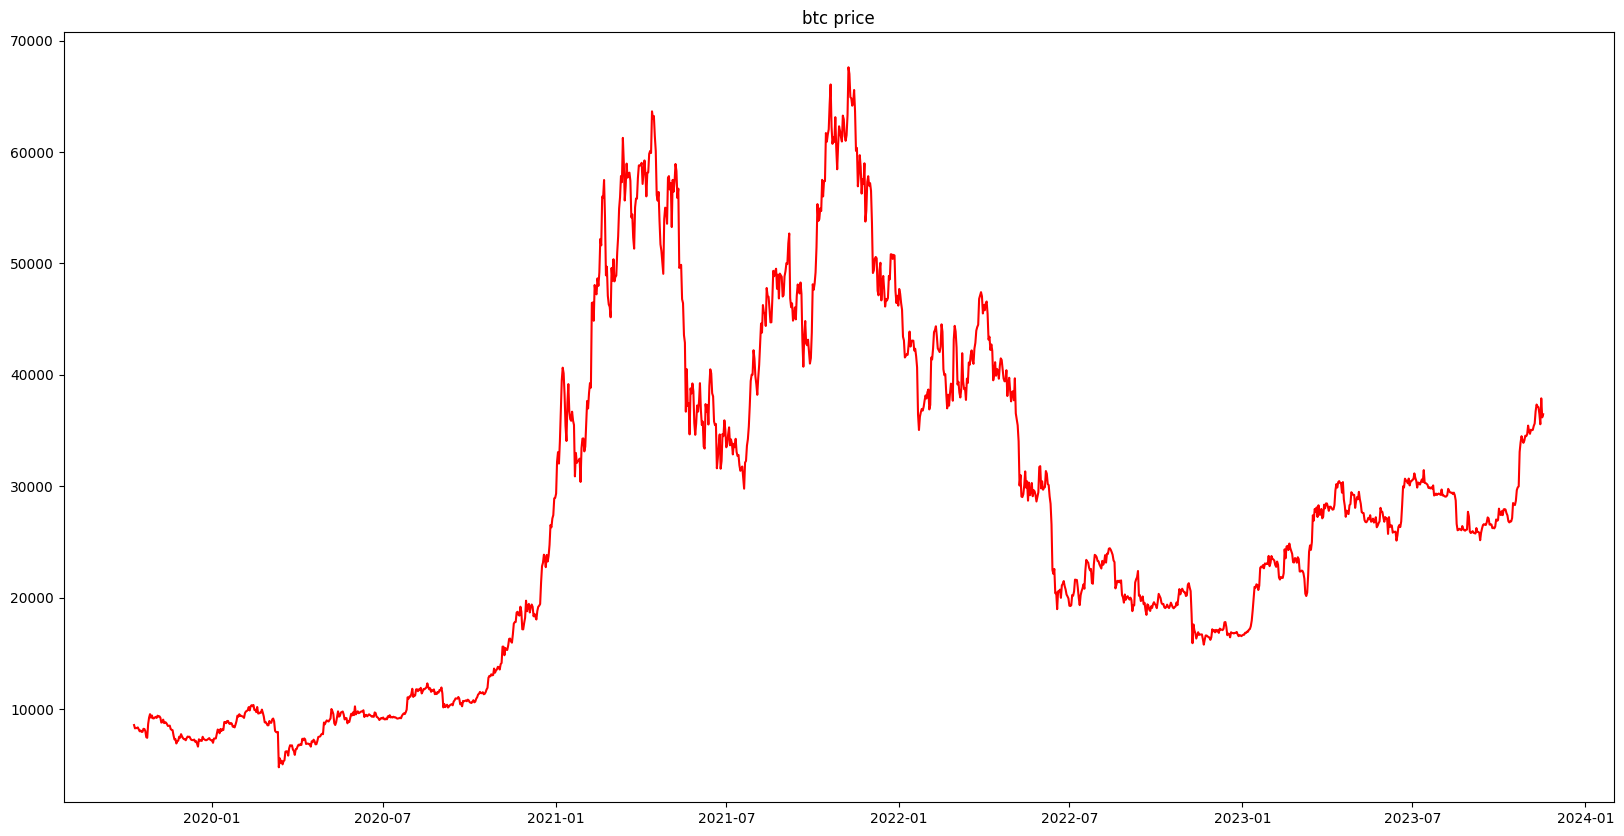

<BarContainer object of 1500 artists>

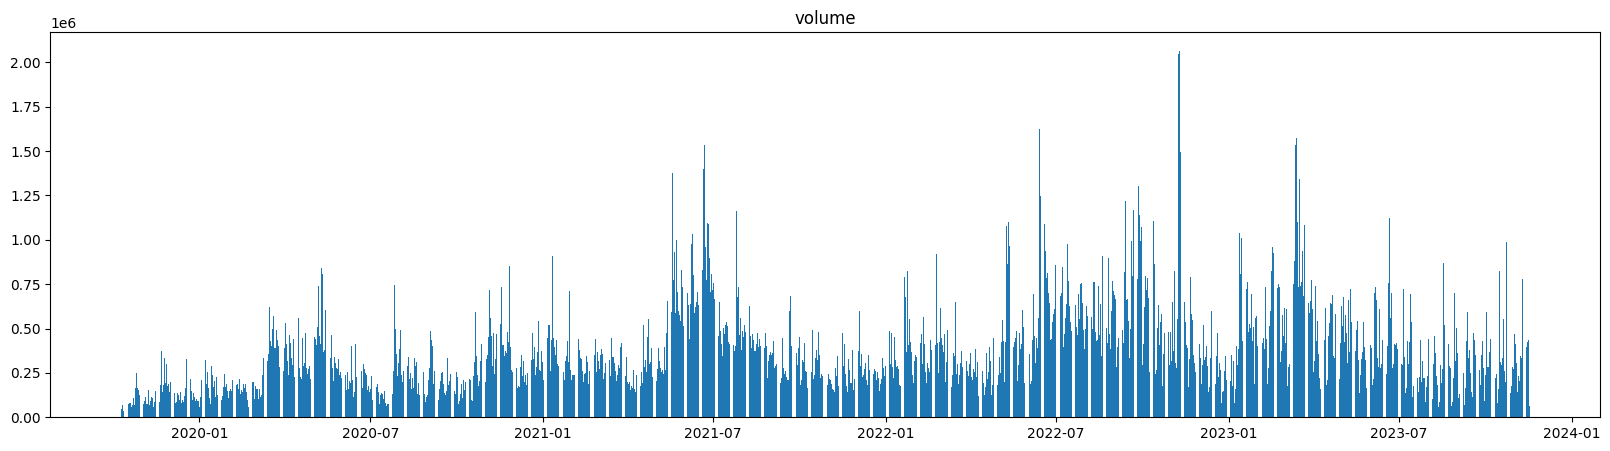

In [34]:
df = prices_data['BTC/USDT:USDT']
plt.figure(figsize=(20, 10))
plt.plot(df['datetime'], df['close'], color = 'red')
plt.title('btc price')
plt.show()

plt.figure(figsize=(20, 5))
plt.title('volume')
plt.bar(df['datetime'], df['volume'])




In [39]:
## 새로운 컬럼 생성

df["5day"] = df['close'].rolling(5, min_periods = 1).mean()
df["60day"] = df['close'].rolling(60, min_periods = 1).mean()
df["120day"] = df['close'].rolling(120, min_periods = 1).mean()

<Figure size 3000x1000 with 0 Axes>

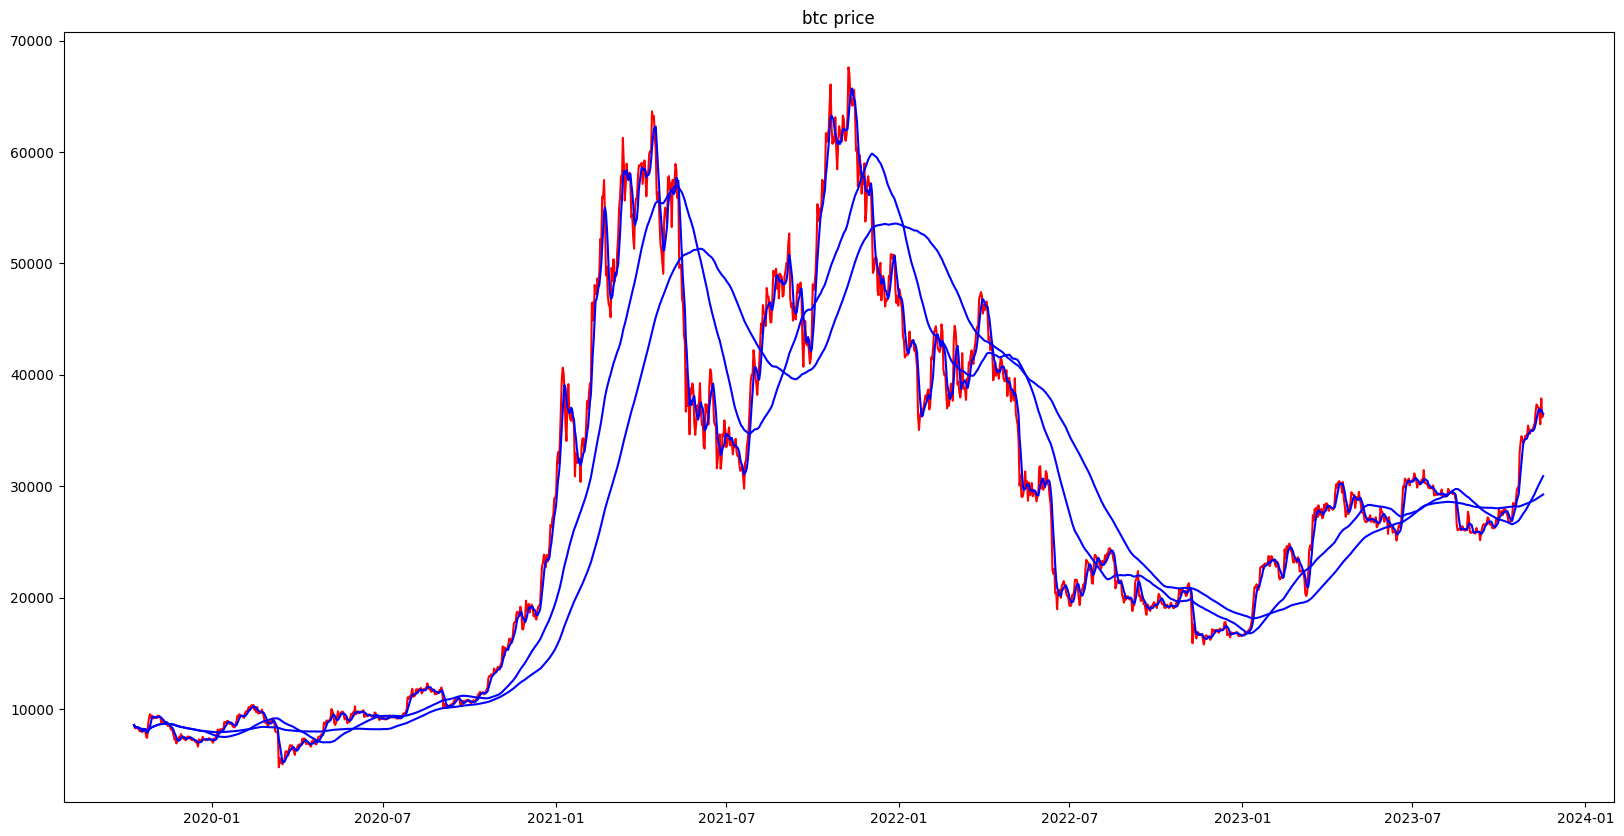

<BarContainer object of 1500 artists>

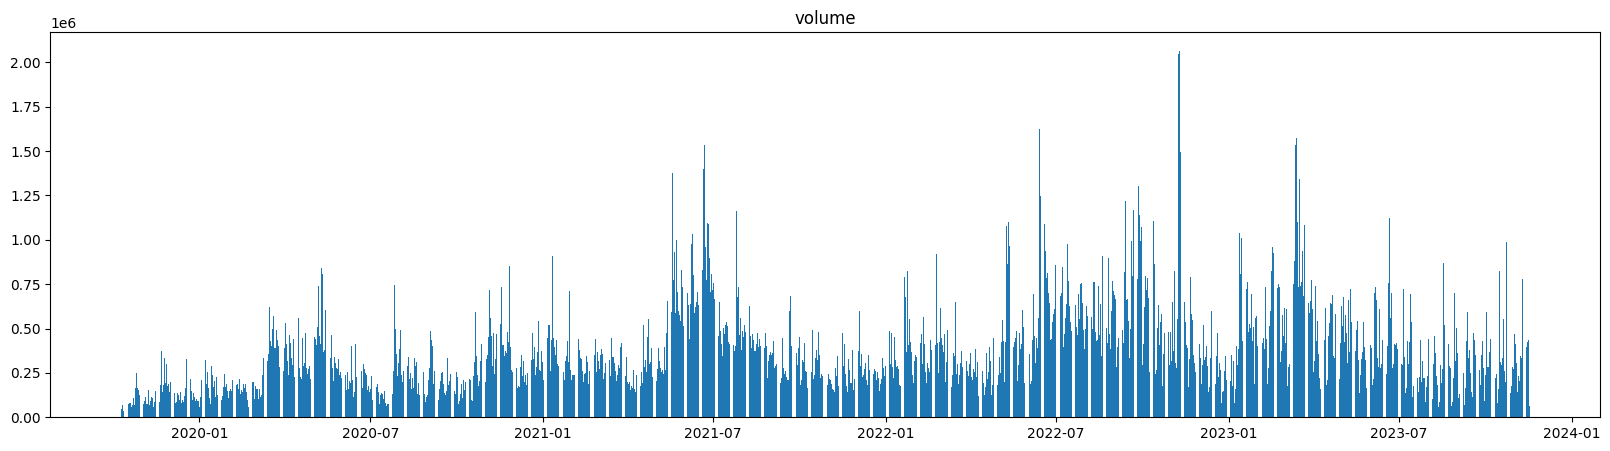

In [45]:
plt.figure(figsize = (30, 10))
plt.figure(figsize=(20, 10))
plt.plot(df['datetime'], df['close'], color = 'red')
plt.title('btc price')

plt.plot(df['datetime'], df["5day"], color = 'blue')
plt.plot(df['datetime'], df["60day"], color = 'blue')
plt.plot(df['datetime'], df["120day"], color = 'blue')
plt.show()

plt.figure(figsize=(20, 5))
plt.title('volume')
plt.bar(df['datetime'], df['volume'])


# Scikit-learn


In [47]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [ ]:
x_tr = df.iloc[:-1]

In [14]:
data = prices_data['BTC/USDT:USDT']

In [15]:
x_data = data[['open', 'high', 'low', 'close']]
y_data = data[['close']]

In [17]:
len(data)

1500

In [34]:
window = 28
away = 7

In [35]:
x_input = []
y_target = []
for i in range(0, len(data) - window - away +1):
    mean = x_data[i:i+window].mean()
    std = x_data[i:i+window].std()
    x = (x_data[i:i+window] - mean)
    x_input.append(x)

    if y_data['close'][i+window-1] < y_data['close'][i+window+away-1]:
        y_target.append(1)
    else:
        y_target.append(0)



In [36]:
import numpy as np
x_input = np.array(x_input)
y_target = np.array(y_target)

In [37]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(x_input, y_target, test_size=0.5)


In [38]:
from tensorflow import keras
model = keras.Sequential()
model.add(keras.layers.LSTM(30, activation='relu', input_shape=(window, 4), dropout=0.3))
model.add(keras.layers.Dense(1, activation='sigmoid'))

In [39]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 30)                4200      
                                                                 
 dense_2 (Dense)             (None, 1)                 31        
                                                                 
Total params: 4231 (16.53 KB)
Trainable params: 4231 (16.53 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [40]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics='accuracy')

In [41]:
model.fit(train_input, train_target, validation_data=(test_input, test_target), epochs = 100, verbose=1)

Epoch 1/100
23/23 [==============================] - 1s 12ms/step - loss: 325.3047 - accuracy: 0.5102 - val_loss: 239.4586 - val_accuracy: 0.4802
Epoch 2/100
23/23 [==============================] - 0s 5ms/step - loss: 375.5864 - accuracy: 0.4748 - val_loss: 256.2359 - val_accuracy: 0.4952
Epoch 3/100
23/23 [==============================] - 0s 5ms/step - loss: 247.1389 - accuracy: 0.4870 - val_loss: 281.4836 - val_accuracy: 0.4761
Epoch 4/100
23/23 [==============================] - 0s 5ms/step - loss: 263.4447 - accuracy: 0.4870 - val_loss: 220.1828 - val_accuracy: 0.4939
Epoch 5/100
23/23 [==============================] - 0s 5ms/step - loss: 253.0662 - accuracy: 0.5280 - val_loss: 178.4915 - val_accuracy: 0.4898
Epoch 6/100
23/23 [==============================] - 0s 5ms/step - loss: 220.0789 - accuracy: 0.4884 - val_loss: 171.8306 - val_accuracy: 0.4843
Epoch 7/100
23/23 [==============================] - 0s 5ms/step - loss: 171.1658 - accuracy: 0.5430 - val_loss: 158.2031 - val_a

## CHATGPT

In [44]:
data

,datetime,open,high,low,close,volume
0,2019-10-12,8255.54,8397.45,8248.34,8300.22,37761.514
1,2019-10-13,8300.31,8456.00,8137.30,8274.66,43820.913
2,2019-10-14,8274.33,8381.77,8205.02,8346.05,61999.821
3,2019-10-15,8346.31,8408.62,8080.00,8160.01,86246.749
4,2019-10-16,8160.55,8184.00,7900.24,7992.21,70434.452
...,...,...,...,...,...,...
1495,2023-11-15,35559.10,38000.00,35388.00,37885.60,423818.570
1496,2023-11-16,37885.50,37956.50,35486.10,36176.00,434444.366
1497,2023-11-17,36176.00,37020.50,35868.30,36621.90,319943.051
1498,2023-11-18,36621.90,36900.00,36196.00,36580.90,121720.922


In [47]:
df

,datetime,open,high,low,close,volume
0,2019-10-12,8255.54,8397.45,8248.34,8300.22,37761.514
1,2019-10-13,8300.31,8456.00,8137.30,8274.66,43820.913
2,2019-10-14,8274.33,8381.77,8205.02,8346.05,61999.821
3,2019-10-15,8346.31,8408.62,8080.00,8160.01,86246.749
4,2019-10-16,8160.55,8184.00,7900.24,7992.21,70434.452
...,...,...,...,...,...,...
1495,2023-11-15,35559.10,38000.00,35388.00,37885.60,423818.570
1496,2023-11-16,37885.50,37956.50,35486.10,36176.00,434444.366
1497,2023-11-17,36176.00,37020.50,35868.30,36621.90,319943.051
1498,2023-11-18,36621.90,36900.00,36196.00,36580.90,121720.922


In [50]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split
df = data
# 데이터 불러오기 (이 예제에서는 'your_data.csv' 파일을 사용한다고 가정)
# df = pd.read_csv('your_data.csv')  # OHLCV 데이터 포함

# 데이터 전처리
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df[['open', 'high', 'low', 'close', 'volume']].values)

# 시퀀스 데이터 생성 함수
def create_dataset(data, time_step=1):
    X, Y = [], []
    for i in range(len(data)-time_step-1):
        a = data[i:(i+time_step), 0:5]  # X: Open, High, Low, Close, Volume
        X.append(a)
        Y.append(data[i + time_step, 3])  # Y: 다음 날의 Close
    return np.array(X), np.array(Y)

time_step = 60
X, Y = create_dataset(scaled_data, time_step)

# 훈련 및 테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# LSTM 모델 구축
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(time_step, 5)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# 모델 컴파일 및 훈련
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, batch_size=32, epochs=10)

# 예측 및 평가
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# 예측값을 원래 스케일로 변환
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

# RMSE 계산 등을 통해 모델 평가 가능


Epoch 1/10
36/36 [==============================] - 2s 14ms/step - loss: 0.0167
Epoch 2/10
36/36 [==============================] - 1s 14ms/step - loss: 0.0020
Epoch 3/10
36/36 [==============================] - 1s 15ms/step - loss: 0.0016
Epoch 4/10
36/36 [==============================] - 0s 14ms/step - loss: 0.0015
Epoch 5/10
36/36 [==============================] - 1s 14ms/step - loss: 0.0015
Epoch 6/10
36/36 [==============================] - 0s 14ms/step - loss: 0.0014
Epoch 7/10
36/36 [==============================] - 0s 14ms/step - loss: 0.0013
Epoch 8/10
36/36 [==============================] - 0s 14ms/step - loss: 0.0012
Epoch 9/10
36/36 [==============================] - 0s 13ms/step - loss: 0.0012
Epoch 10/10
9/9 [==============================] - 0s 5ms/step


ValueError: non-broadcastable output operand with shape (1151,1) doesn't match the broadcast shape (1151,5)

In [54]:
# 예측값을 원래 스케일로 변환하기 전에 형태 조정
# 여기서는 Close 가격만 예측했으므로, 나머지 컬럼은 0으로 채웁니다.
def reshape_predictions(predictions):
    return np.pad(predictions, [(0, 0), (0, 4)], mode='constant', constant_values=0)

train_predict_reshaped = reshape_predictions(train_predict)
test_predict_reshaped = reshape_predictions(test_predict)

# 스케일링을 역변환
train_predict = scaler.inverse_transform(train_predict_reshaped)[:, 0]
test_predict = scaler.inverse_transform(test_predict_reshaped)[:, 0]


In [55]:
train_predict

array([28255.594, 58356.633,  9544.646, ..., 29866.375, 39876.844,
       17053.498], dtype=float32)

In [57]:
import matplotlib.pyplot as plt

# 원본 데이터의 'Close' 가격을 가져옵니다.
actual_prices = df['close'].values

# 훈련 데이터와 테스트 데이터의 길이를 계산합니다.
train_data_len = len(train_predict)

# 전체 데이터셋에 대해 예측값을 채웁니다 (훈련 데이터 부분은 NaN으로 채웁니다).
total_predicted_prices = np.empty_like(actual_prices)
total_predicted_prices[:] = np.nan
total_predicted_prices[train_data_len:] = test_predict

# 실제 가격과 예측 가격을 그래프에 표시합니다.
plt.figure(figsize=(16, 8))
plt.title('Model Predictions vs Real Prices')
plt.xlabel('Days', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(actual_prices, label='Real Price')
plt.plot(total_predicted_prices, label='Predicted Price', alpha=0.7)
plt.legend()
plt.show()


ValueError: could not broadcast input array from shape (288,) into shape (349,)

In [59]:
len(total_predicted_prices)

1500

In [213]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split

# 데이터 불러오기 및 전처리
# df = pd.read_csv('your_data.csv')  # 'your_data.csv'에는 과거 OHLCV 데이터가 포함되어 있어야 함

# 7일 후 가격 상승/하락 예측을 위한 목표 변수 생성
df['Future_Close'] = df['close'].shift(-7)  # 7일 후 종가
df['Target'] = (df['Future_Close'] > df['close']).astype(int)  # 현재보다 7일 후 가격이 높으면 1, 아니면 0
df.dropna(inplace=True)  # 결측치 제거

# 특징과 목표 변수 분리
X = df[['open', 'high', 'low', 'close', 'volume']].values
y = df['Target'].values

# 데이터 스케일링
scaler = MinMaxScaler(feature_range=(0, 1))
X_scaled = scaler.fit_transform(X)

# 시퀀스 데이터 생성 함수
def create_dataset(X, y, time_step):
    Xs, ys = [], []
    for i in range(len(X) - time_step):
        Xs.append(X[i:(i + time_step)])
        ys.append(y[i + time_step])
    return np.array(Xs), np.array(ys)

time_step = 30  # 과거 60일의 데이터를 사용
X_seq, y_seq = create_dataset(X_scaled, y, time_step)

# 훈련 및 테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, random_state=42)

# LSTM 모델 구축
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_step, 5)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1, activation='sigmoid'))  # 이진 분류를 위한 sigmoid 활성화 함수

# 모델 컴파일
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 모델 훈련
model.fit(X_train, y_train, batch_size=32, epochs=100, validation_data=(X_test, y_test))

# 모델 성능 평가
_, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")


Epoch 1/100
13/13 [==============================] - 2s 44ms/step - loss: 0.6931 - accuracy: 0.4963 - val_loss: 0.6886 - val_accuracy: 0.6139
Epoch 2/100
13/13 [==============================] - 0s 10ms/step - loss: 0.6880 - accuracy: 0.5484 - val_loss: 0.6813 - val_accuracy: 0.5644
Epoch 3/100
13/13 [==============================] - 0s 10ms/step - loss: 0.6840 - accuracy: 0.6055 - val_loss: 0.6791 - val_accuracy: 0.6535
Epoch 4/100
13/13 [==============================] - 0s 10ms/step - loss: 0.6798 - accuracy: 0.5881 - val_loss: 0.6694 - val_accuracy: 0.6238
Epoch 5/100
13/13 [==============================] - 0s 10ms/step - loss: 0.6780 - accuracy: 0.5707 - val_loss: 0.6636 - val_accuracy: 0.6238
Epoch 6/100
13/13 [==============================] - 0s 11ms/step - loss: 0.6735 - accuracy: 0.5806 - val_loss: 0.6771 - val_accuracy: 0.5446
Epoch 7/100
13/13 [==============================] - 0s 11ms/step - loss: 0.6797 - accuracy: 0.5484 - val_loss: 0.6703 - val_accuracy: 0.5446
Epoch 

In [214]:
model.save('gpt.h5')

c:\Users\tomkj\anaconda3\envs\autobot\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [74]:
new_data =new_df

In [209]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import load_model

# 새 OHLCV 데이터 파일 불러오기
# new_data = pd.read_csv('new_ohlcv_data.csv')

# 데이터 전처리
# 기존에 사용된 스케일러를 사용하여 동일한 방법으로 데이터 스케일링
scaler = MinMaxScaler(feature_range=(0, 1))
new_scaled_data = scaler.fit_transform(new_df[['open', 'high', 'low', 'close', 'volume']].values)


timestamp = []
# 시퀀스 데이터 생성 함수
def create_dataset(X, time_step):
    Xs = []
    global timestamp
    for i in range(len(X) - time_step):
        Xs.append(X[i:(i + time_step)])
        timestamp.append(new_df['datetime'][i])
    return np.array(Xs)

# 함수 호출
time_step = 60  # 모델 훈련에 사용된 time_step
X_new = create_dataset(new_scaled_data, time_step)

# 기존에 훈련된 모델 불러오기
model = load_model('gpt.h5')

# 새 데이터에서 모델 성능 평가
# 이 경우, 정확한 레이블이 없기 때문에 예측값만 생성
predictions = model.predict(X_new)

# 예측 결과 출력 또는 추가 분석
print(predictions)


29/29 [==============================] - 1s 6ms/step
[[9.56603229e-01]
 [9.40898120e-01]
 [8.65887821e-01]
 [6.83978021e-01]
 [4.38435435e-01]
 [2.39761010e-01]
 [1.25368625e-01]
 [6.89829662e-02]
 [4.39571105e-02]
 [3.38510722e-02]
 [3.27646136e-02]
 [3.71946804e-02]
 [4.70100902e-02]
 [6.28676564e-02]
 [8.89310166e-02]
 [1.29057735e-01]
 [1.85693562e-01]
 [2.57752270e-01]
 [3.39115590e-01]
 [4.23010290e-01]
 [5.10943174e-01]
 [5.93339384e-01]
 [6.63393974e-01]
 [7.14962244e-01]
 [7.51171589e-01]
 [7.74596393e-01]
 [7.93053091e-01]
 [8.07377815e-01]
 [8.27369571e-01]
 [8.49725366e-01]
 [8.71322274e-01]
 [8.86478424e-01]
 [8.94273639e-01]
 [8.95499766e-01]
 [8.89099836e-01]
 [8.75052750e-01]
 [8.26984584e-01]
 [6.88040257e-01]
 [5.39105475e-01]
 [4.77370948e-01]
 [4.58801210e-01]
 [4.93948907e-01]
 [5.30565679e-01]
 [5.71008742e-01]
 [5.99399984e-01]
 [6.07047975e-01]
 [5.89196742e-01]
 [5.50658286e-01]
 [5.19032300e-01]
 [4.93000865e-01]
 [4.46529090e-01]
 [3.90184045e-01]
 [3.4980166

In [206]:
timestamp.append(new_df['datetime'][0])

In [212]:
timestamp[60]

Timestamp('2021-06-08 00:00:00')

In [174]:
new_scaled_data = scaler.fit_transform(df[['open', 'high', 'low', 'close', 'volume']].values)
time_step = 60
X_new = create_dataset(new_scaled_data, time_step)
# df = pd.DataFrame(X_new[0])
model.predict(X_new)[0]

16/16 [==============================] - 0s 5ms/step


array([0.99964875], dtype=float32)

In [183]:
print(df[:61], df[67:68])

              open    high     low   close        volume     Date
datetime                                                         
2022-06-01  1.3600  1.3889  1.0353  1.2336  1.298153e+08  19144.0
2022-06-02  1.2327  1.6200  1.0500  1.5460  7.337575e+08  19145.0
2022-06-03  1.5455  1.6500  1.2881  1.3615  5.957100e+08  19146.0
2022-06-04  1.3614  1.4848  1.2930  1.3921  3.738373e+08  19147.0
2022-06-05  1.3916  1.4333  1.1493  1.1654  3.520661e+08  19148.0
...            ...     ...     ...     ...           ...      ...
2022-07-27  0.8258  1.0854  0.8048  1.0517  5.796251e+08  19200.0
2022-07-28  1.0516  1.5581  1.0306  1.4477  1.200760e+09  19201.0
2022-07-29  1.4474  1.9658  1.4056  1.8398  1.114393e+09  19202.0
2022-07-30  1.8398  1.8887  1.6400  1.8084  5.166403e+08  19203.0
2022-07-31  1.8083  1.8090  1.5701  1.5839  2.689652e+08  19204.0

[61 rows x 6 columns]               open    high     low   close       volume     Date
datetime                                              

In [177]:
df

,open,high,low,close,volume,Date
datetime,,,,,,
2022-06-01,1.3600,1.3889,1.0353,1.2336,129815300.9,19144.0
2022-06-02,1.2327,1.6200,1.0500,1.5460,733757543.4,19145.0
2022-06-03,1.5455,1.6500,1.2881,1.3615,595709962.3,19146.0
2022-06-04,1.3614,1.4848,1.2930,1.3921,373837319.6,19147.0
2022-06-05,1.3916,1.4333,1.1493,1.1654,352066079.6,19148.0
...,...,...,...,...,...,...
2023-11-19,1.7418,1.7927,1.6975,1.7807,73031852.5,19680.0
2023-11-20,1.7807,1.8091,1.7172,1.7300,90793543.5,19681.0
2023-11-21,1.7300,1.7560,1.5679,1.5913,118078686.6,19682.0


In [95]:
import matplotlib.pyplot as plt
from mpl_finance import candlestick_ohlc
import pandas as pd
import matplotlib.dates as mdates


In [106]:
for key in prices_data:
    print(key)

NKN/USDT:USDT
ATOM/USDT:USDT
OP/USDT:USDT
DGB/USDT:USDT
JASMY/USDT:USDT
DUSK/USDT:USDT


In [201]:
new_df = prices_data["NKN/USDT:USDT"]

In [202]:
new_df

,datetime,open,high,low,close,volume
0,2021-04-09,1.18000,1.48400,1.06982,1.29297,181527351.0
1,2021-04-10,1.29483,1.32848,0.98336,1.02558,143947257.0
2,2021-04-11,1.02558,1.06434,0.92240,0.95244,94044054.0
3,2021-04-12,0.95413,0.98000,0.85000,0.87208,90756168.0
4,2021-04-13,0.87244,0.93664,0.82200,0.85092,62032500.0
...,...,...,...,...,...,...
954,2023-11-19,0.10611,0.11198,0.10327,0.11007,332162997.0
955,2023-11-20,0.11012,0.11398,0.10670,0.11167,190006637.0
956,2023-11-21,0.11167,0.11548,0.10439,0.10637,285690095.0
957,2023-11-22,0.10632,0.11525,0.10600,0.11233,163254051.0


In [133]:
df = prices_data["OP/USDT:USDT"]
df.set_index('datetime', inplace=True)
df['Date'] = df.index.map(mdates.date2num)
ohlc_data = df[['Date', 'open', 'high', 'low', 'close']]

In [148]:
ohlc_data[-10:-9].index

DatetimeIndex(['2023-11-14'], dtype='datetime64[ns]', name='datetime', freq=None)

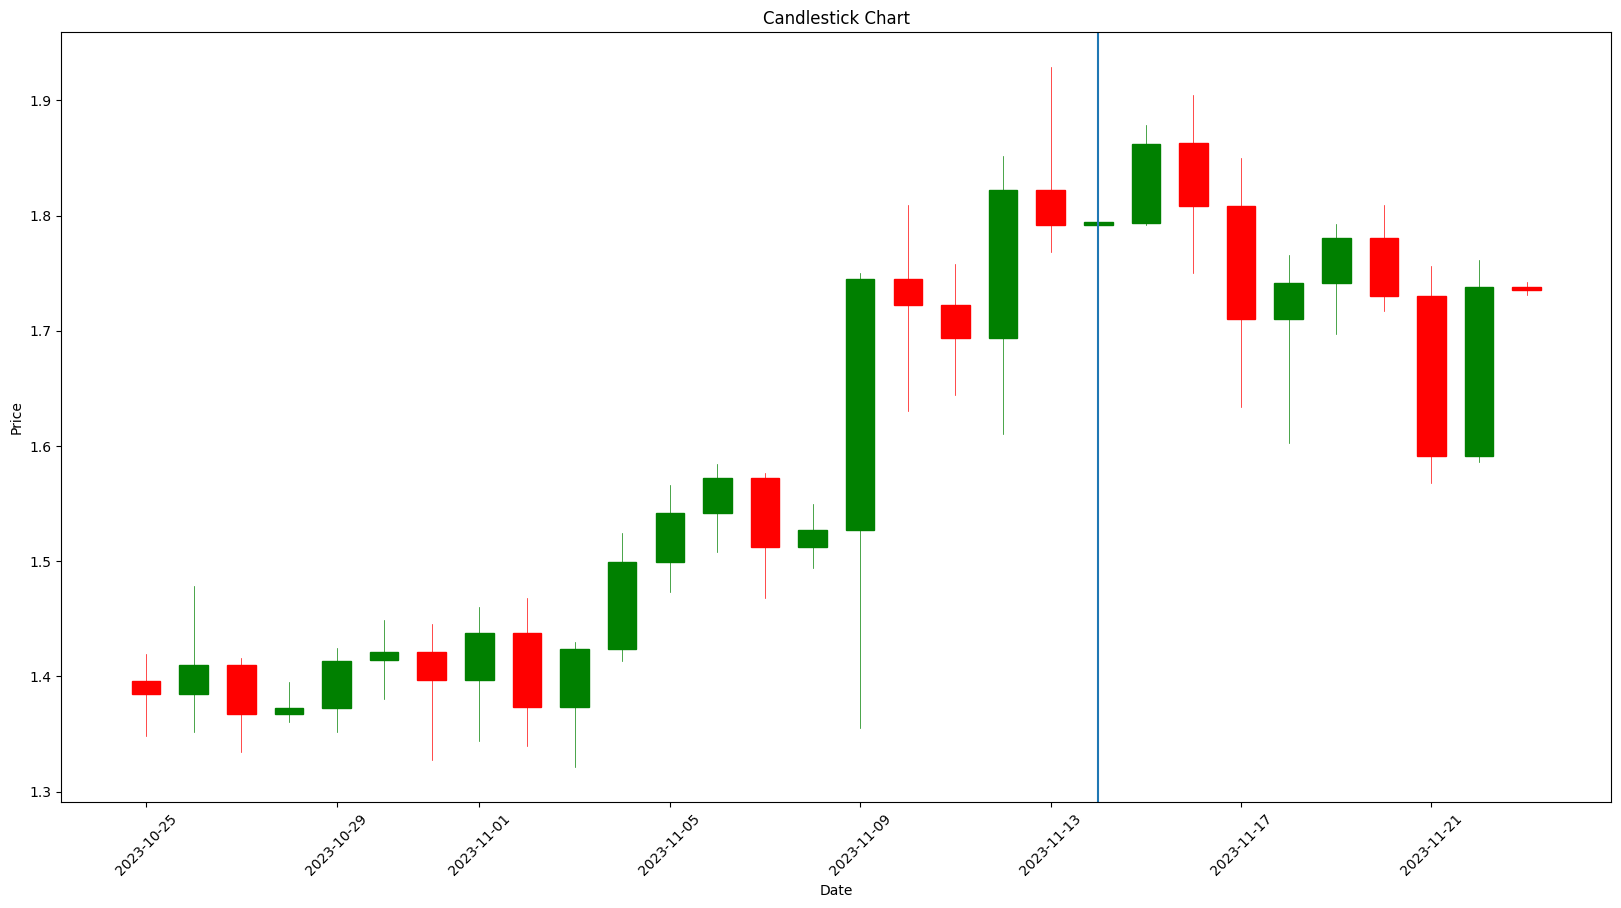

In [149]:
# Create a new figure
fig, ax = plt.subplots(figsize=(20,10))

# Plot candlestick chart
candlestick_ohlc(ax, ohlc_data[-30:].values, width=0.6, colorup='g', colordown='r')

# Set x-axis labels to be dates
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Candlestick Chart')
plt.axvline(x=ohlc_data[-10:-9].index)
# Show the chart
plt.show()


In [82]:
from sklearn.metrics import accuracy_score

# 새 데이터에 대한 실제 레이블 (new_labels) 필요
# 예: new_labels = [0, 1, 0, 1, ...]

# 새 데이터에서 모델로 예측 수행
predictions = model.predict(X_new)
predicted_labels = np.round(predictions).astype(int).flatten()

# 모델의 정확도 계산
accuracy = accuracy_score(new_labels, predicted_labels)
print(f"Accuracy on new data: {accuracy * 100:.2f}%")


42/42 [==============================] - 0s 5ms/step


NameError: name 'new_labels' is not defined